# Convergence

There are a few input parameters that can help ease convergence of the interior-atmosphere coupling algorithm. These are:

- The **radius initial guess** in Earth radii: ``Rguess`` (default value is 11.2 Earth radii)
- The **mass power law**: ``pow_law_formass`` (default value is 0.32)
- The **tolerance**: ``tolerance`` (default value is 0.001)

``Rguess`` and ``tolerance`` are specified in the ``main()`` functions of the coupling and thermal evolution classes, while ``pow_law_formass`` is defined when the class is created. If the algorithm does not converge after 20 iterations, the power law will be reduced by 0.05 until convergence is reached. In that case, a message similar to the following will be displayed: 

.. code-block:: language

   Warning in Coupling.py: The number of interior-atmosphere iterations is greater than 20 
   The current relative difference between radii is 0.00294796
   Readjusting mass power law to 0.315

We recommend increasing the tolerance only as a last resort, as this may risk producing a least accurate interior-atmosphere model.

On another note, a high ``pow_law_formass`` can lead to the following error, which concerns only the interior model (not the interior-atmosphere algorithm):

.. code-block:: language

   Error in interior structure model (Fortran): Mass of core layer is NaN
   This is likely due to a spatial resolution of the radius grid that is
   too small to resolve the size of the core
   Increase the resolution of the grid by setting a lower value for the
   input parameter pow_law_formass

After showing this message, the program execution will stop. We recommend decreasing the power law parameter by 0.05 manually. This may be needed for planets with low masses (i.e Neptune or sub-Neptune mass) and/or with high metal content. The ``pow_law_formass`` parameter should not be lower than 0.29.

Finally, there is a parameter that controls the maximum number of the interior model (not the interior-atmosphere algorithm), ``j_max``. This is specified in the ``main()`` functions of the coupling and thermal evolution classes. The default value is 30, which works for most models with surface pressure ``P_surf`` = 1000 bar. For lower surface pressures, or planets with very low surface gravity (see example below), the interior model may need more than 30 iterations to reach convergence. In that case, the following message will be displayed: 

.. code-block:: language

   Running interior structure model
   [i] Allowed maximum number of iterations reached.


We recommend increasing ``j_max``, to no more than ``j_max = 99``. Sometimes, even if ``j_max`` is in its maximum value and the final radius has converged, the message above can be displayed. This is due to the fact that the interior model uses a precision of 1e-5 to check if the interior structure profiles have converged. A good way to check if this is the case is to plot the evolution of the planet radius and layer interfaces with iteration number. This information is in the ``myplanet.intrf_hist`` and ``myplanet.iter_num`` arrays.



Running interior structure model
 [i] Allowed maximum number of iterations reached.
 

Running interior structure model
 [i] Allowed maximum number of iterations reached.
 

Running interior structure model
 [i] Allowed maximum number of iterations reached.
 

Running interior structure model
 [i] Allowed maximum number of iterations reached.
 

Running interior structure model
 [i] Allowed maximum number of iterations reached.
 

Convergence reached in surface temperature and bulk radius

log(Fe/H) atm [x solar] (input) =  0.0
C/O atm (input) =  0.55
Zenv (output) =  0.012951408685528722
Total planet mass M [M_earth] =  50.24370411690289
Temperature at 1000 bar [K] =  2960.795466160583
Planet bulk radius [R_jup] =  0.9690601298023125
log10_g: Planet surface gravity (1000 bar) [cm/s2] =  2.617419244680929
Total planet radius [R_jup] =  1.1924782872618327
Total metal mass [M_earth] =  5.6100244829938015


"\n# Save plot\nfig.savefig('convergence_tutorial.pdf', bbox_inches='tight', format='pdf', dpi=1000)\nplt.close(fig)\n"

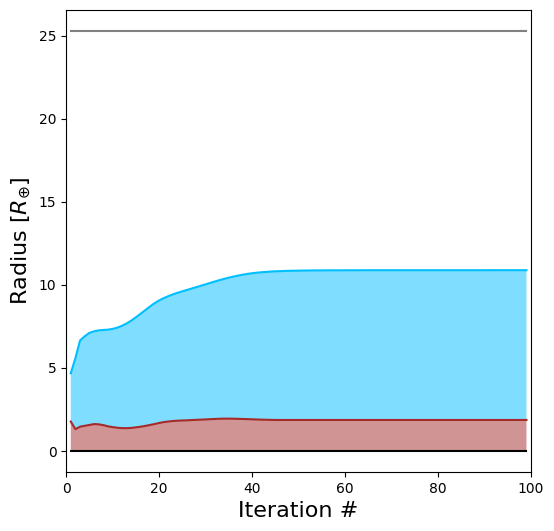

In [1]:
# Import GASTLI modules
import gastli.Coupling as cpl
import gastli.constants as cte
# Other Python modules
import numpy as np
import matplotlib.pyplot as plt
# Create coupling class
my_coupling = cpl.coupling(j_max=99, pow_law_formass=0.31)
# Input for interior
M_P = 50.
# Internal and equilibrium temperatures
Tintpl = 150.
Teqpl = 1000.
# Core mass fraction
CMF = 0.1
# Call to coupled interior-atm. model (and time it)
my_coupling.main(M_P, CMF, Teqpl, Tintpl, CO=0.55, log_FeH=0.,Rguess=6.)
# Composition input
print("log(Fe/H) atm [x solar] (input) = ",my_coupling.myatmmodel.log_FeH)
print("C/O atm (input) = ",my_coupling.myatmmodel.CO)
# Output
print("Zenv (output) = ",my_coupling.myatmmodel.Zenv_pl)
print("Total planet mass M [M_earth] = ",my_coupling.Mtot)
print("Temperature at 1000 bar [K] = ",my_coupling.T_surf)
print("Planet bulk radius [R_jup] = ",my_coupling.Rbulk_Rjup)
print("log10_g: Planet surface gravity (1000 bar) [cm/s2] = ",np.log10(my_coupling.g_surf_planet))
print("Total planet radius [R_jup] = ",my_coupling.Rtot)
tmm = my_coupling.Mtot*CMF + my_coupling.Mtot*(1-CMF)*my_coupling.myatmmodel.Zenv_pl
print("Total metal mass [M_earth] = ",tmm)
# Arrays for convergence check
base = my_coupling.myplanet.intrf_hist[0,:]
core = my_coupling.myplanet.intrf_hist[1,:]
envelope = my_coupling.myplanet.intrf_hist[2,:]
surface = my_coupling.myplanet.intrf_hist[3,:]
x = my_coupling.myplanet.iter_num
r = my_coupling.myplanet.r/cte.constants.r_e
mask = core != 0
# Plot to check convergence
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
plt.plot(x[mask], r[base[mask]-1], linestyle='solid', color='black')
plt.plot(x[mask], r[core[mask]-1], linestyle='solid', color='brown')
plt.plot(x[mask], r[envelope[mask]-1], linestyle='solid', color='deepskyblue')
plt.plot(x[mask], r[surface[mask]-2], linestyle='solid', color='grey')
ax.fill_between(x[mask], r[base[mask]-1], r[core[mask]-1], facecolor='brown',alpha=0.5)
ax.fill_between(x[mask], r[core[mask]-1], r[envelope[mask]-1], facecolor='deepskyblue',alpha=0.5)
plt.xlabel(r'Iteration #', fontsize=16)
plt.ylabel(r'Radius [$R_{\oplus}$]', fontsize=16)
plt.xlim(0, 100)
'''
# Save plot
fig.savefig('convergence_tutorial.pdf', bbox_inches='tight', format='pdf', dpi=1000)
plt.close(fig)
'''

In this plot, the blue shade corresponds to the envelope layer, while the brown one represents the core. The radii of the core and the envelope converge to constant values at approximately 40 iterations.